# Linear Transformations

In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

## Matrix Multiplication

Let's create an asymmetrical figure in the xy-plane by defining lists of $x$ and $y$ coordinates.

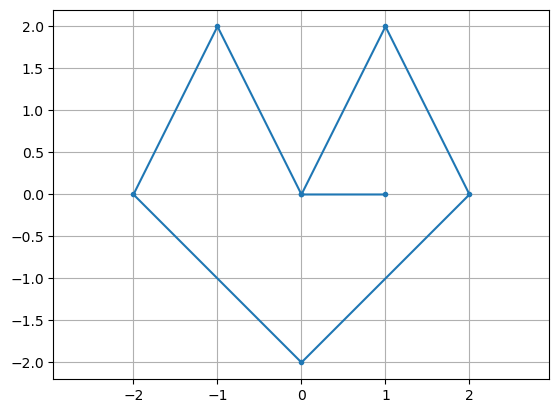

In [15]:
x = [0.,-1.,-2.,0.,2.,1.,0.,1.]
y = [0.,2.,0.,-2.,0.,2.,0.,0.]
plt.plot(x,y,'.-'), plt.grid(True), plt.axis('equal')
plt.show()

Note that we use the command `plt.grid(True)` to include a grid in the figure and `plt.axis('equal')` plots the figure with equal scaling in the $x$ and $y$ directions.

Stack the vectors of $x$ and $y$ coordinates to create a matrix $X$. The columns of $X$ are the coordinates of the points defining the vertices of the figure above. The row at index 0 are the $x$-coordinates and the row at index 1 are the $y$-coordinates.

In [16]:
X = np.row_stack([x,y])
print(X)

[[ 0. -1. -2.  0.  2.  1.  0.  1.]
 [ 0.  2.  0. -2.  0.  2.  0.  0.]]


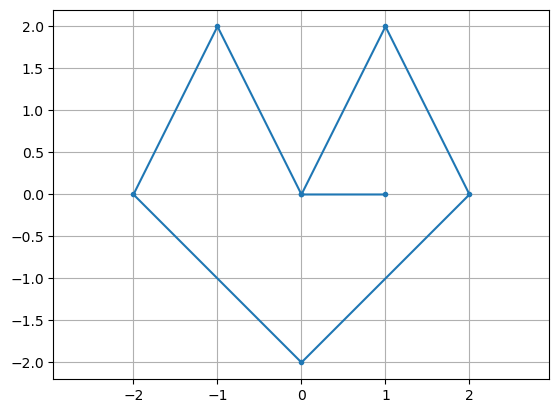

In [17]:
plt.plot(X[0,:],X[1,:],'.-'), plt.grid(True), plt.axis('equal')
plt.show()

Any linear transformation of $\mathbb{R}^2$ can be written as a 2 by 2 matrix with respect to the standard basis. Therefore we can apply to the figure above a linear transformation given by matrix $A$ by computing matrix multiplication:

$$
AX = A \begin{bmatrix}
x_0 & x_1 & \cdots & x_N \\ y_0 & y_1 & \cdots & y_N
\end{bmatrix}
= \begin{bmatrix}
A \begin{bmatrix} x_0 \\ y_0 \end{bmatrix} &
A \begin{bmatrix} x_1 \\ y_1 \end{bmatrix} &
\cdots &
A \begin{bmatrix} x_N \\ y_N \end{bmatrix}
\end{bmatrix}
$$

where column at index $k$ corresponds to the point $(x_k,y_k) \in \mathbf{R}^2$. In other words, the column at index $k$ in the product $AX$ are the coordinates of the transformed point $A \begin{bmatrix} x_k \\ y_k \end{bmatrix}$.

## Rotation Matrix

A rotation matrix is given by

$$
R_{\theta} = \begin{bmatrix} \cos(\theta) & \sin(\theta) \\ -\sin(\theta) & \cos(\theta) \end{bmatrix}
$$

The linear transformation corresponding to $R_{\theta}$ is rotation about the origin clockwise by $\theta$ radians.

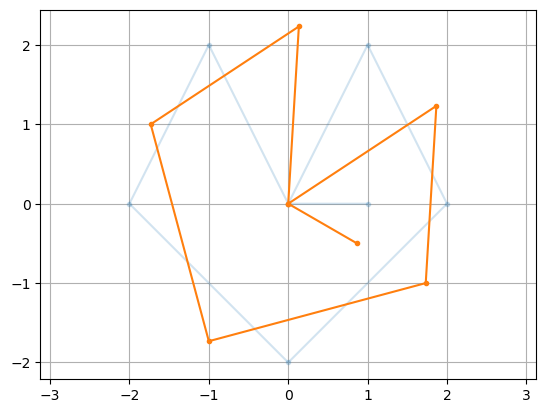

In [27]:
theta = np.pi/6
R = np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
RX = R@X

plt.plot(X[0,:],X[1,:],'.-',alpha=0.2)
plt.plot(RX[0,:],RX[1,:],'.-'), plt.axis('equal'), plt.grid(True)
plt.show()

## Scaling Matrix

A scaling matrix is given by

$$
C_{a,b} = \begin{bmatrix} a & 0 \\ 0 & b \end{bmatrix}
$$

The linear transformation corresponding to $C_{a,b}$ is scaling by $a$ is the $x$-direction and scaling by $b$ in the $y$-direction.

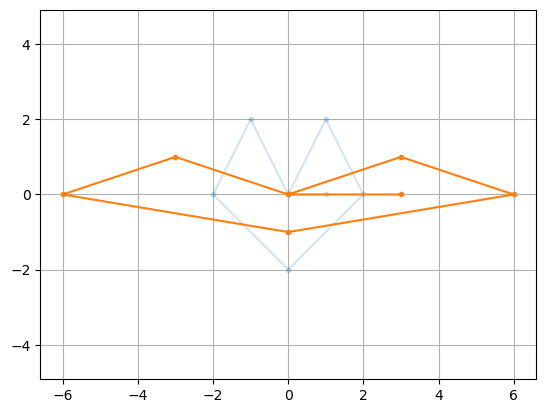

In [29]:
a = 3; b = 1/2;
C = np.diag([a,b])
CX = C@X

plt.plot(X[0,:],X[1,:],'.-',alpha=0.2)
plt.plot(CX[0,:],CX[1,:],'.-'), plt.axis('equal'), plt.grid(True)
plt.show()

## Shear Matrix

A shear matrix is given by

$$
S_u = \begin{bmatrix} 1 & u \\ 0 & 1 \end{bmatrix}
$$

The linear transformation corresponding to $S_u$ is shear by factor $u$ in the $x$-direction.

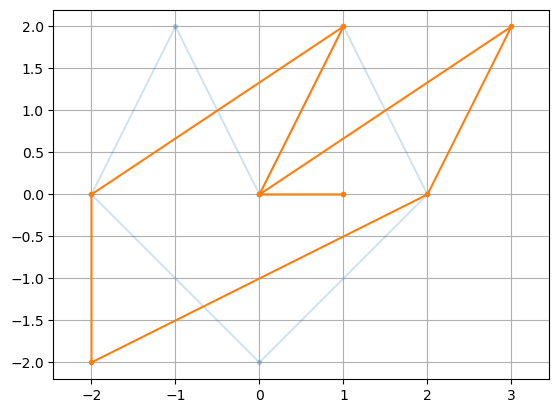

In [30]:
u = 1
S = np.array([[1,u],[0,1]])
SX = S@X

plt.plot(X[0,:],X[1,:],'.-',alpha=0.2)
plt.plot(SX[0,:],SX[1,:],'.-'), plt.axis('equal'), plt.grid(True)
plt.show()

## Projection Matrix

The matrix which projects onto the line at angle $\theta$ with the $x$-axis is given by

$$
P_{\theta} = \begin{bmatrix}
\cos^2 \theta & \cos \theta \sin \theta \\
\cos \theta \sin \theta & \sin^2 \theta
\end{bmatrix}
$$

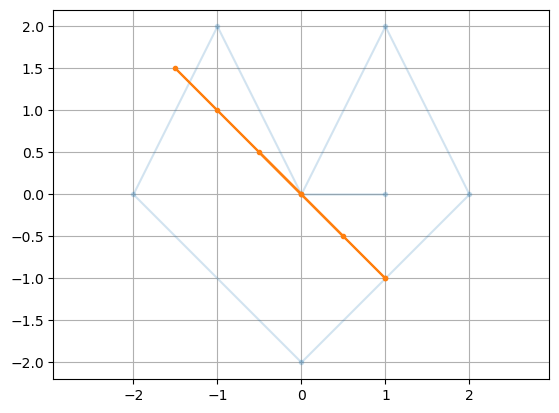

In [34]:
theta = -np.pi/4
P = np.array([[np.cos(theta)**2,np.cos(theta)*np.sin(theta)],
              [np.cos(theta)*np.sin(theta),np.sin(theta)**2]])
PX = P@X

plt.plot(X[0,:],X[1,:],'.-',alpha=0.2)
plt.plot(PX[0,:],PX[1,:],'.-'), plt.axis('equal'), plt.grid(True)
plt.show()

## Reflection Matrix

The matrix which refelcts through the line at angle $\theta$ with the $x$-axis is given by

$$
F_{\theta} = \begin{bmatrix}
\cos 2\theta & \sin 2\theta \\
\sin 2\theta & -\cos 2 \theta
\end{bmatrix}
$$

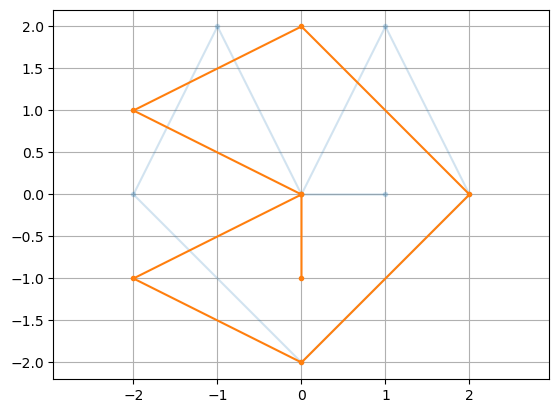

In [36]:
theta = -np.pi/4
F = np.array([[np.cos(2*theta),np.sin(2*theta)],
              [np.sin(2*theta),-np.cos(2*theta)]])
FX = F@X

plt.plot(X[0,:],X[1,:],'.-',alpha=0.2)
plt.plot(FX[0,:],FX[1,:],'.-'), plt.axis('equal'), plt.grid(True)
plt.show()